In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# load dataframe 1
df1 = pd.read_csv("all-data.csv", encoding="cp1252", names=["class", "Text"])

# Remove neutral labels
df1 = df1[df1["class"] != 'neutral']

# keep text and class columns only
df1 = df1[["Text","class"]]

# replace text label to numerical label
df1['class'] = df1['class'].map({'positive': 1, 'negative': -1})

# print class labels and number of samples for 1 and -1
print(df1['class'].unique())
print("Positives:", df1[df1['class'] == 1].shape, "Negatives:",df1[df1['class'] == -1].shape, "Total:", df1.shape)
df1.head()

[-1  1]
Positives: (1363, 2) Negatives: (604, 2) Total: (1967, 2)


,Text,class
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1
6,"For the last quarter of 2010 , Componenta 's n...",1


In [ ]:
# load dataframe 2
df2 = pd.read_csv("stock_data.csv")

# rename column name
df2.rename({"Sentiment" : "class"}, inplace=True, axis=1)

# Print number of 1 and -1
print("Positives:", df2[df2['class'] == 1].shape, "Negatives:",df2[df2['class'] == -1].shape, "Total:", df2.shape)
df2.head()

Positives: (3685, 2) Negatives: (2106, 2) Total: (5791, 2)


,Text,class
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
# concatenate dataframes
df_concatenated = pd.concat([df1, df2], ignore_index=True)

# Print final size of dataset
print("Positives:", df_concatenated[df_concatenated['class'] == 1].shape, "Negatives:",df_concatenated[df_concatenated['class'] == -1].shape, "Total:", df_concatenated.shape)

# See first 5 rows of dataset
df_concatenated.head()

Positives: (5048, 2) Negatives: (2710, 2) Total: (7758, 2)


,Text,class
0,The international electronic industry company ...,-1
1,With the new production plant the company woul...,1
2,According to the company 's updated strategy f...,1
3,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1
4,"For the last quarter of 2010 , Componenta 's n...",1


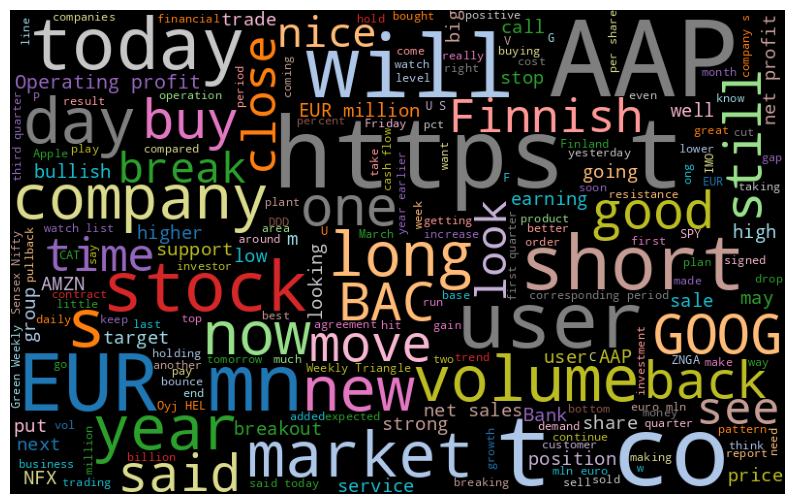

In [ ]:
# Print word cloud of all words
all_words = " ".join([text for text in df_concatenated['Text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, colormap="tab20").generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

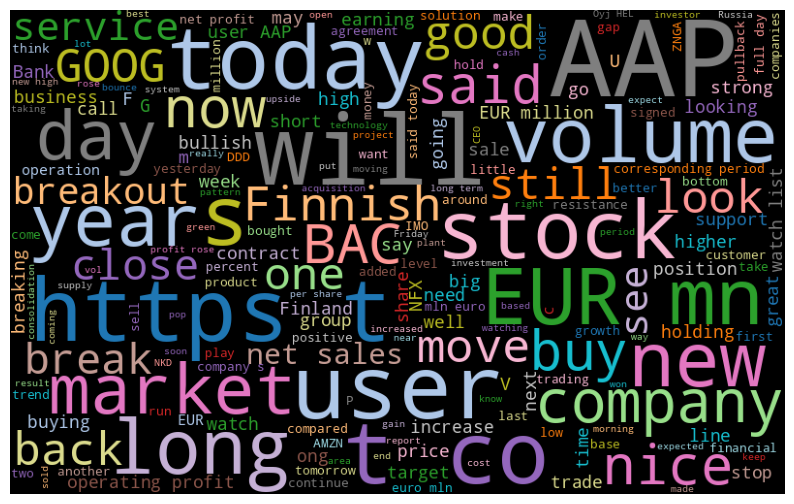

In [ ]:
# Print word cloud of positive text
pos_words = " ".join([text for text in df_concatenated['Text'][df_concatenated['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, colormap="tab20").generate(pos_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

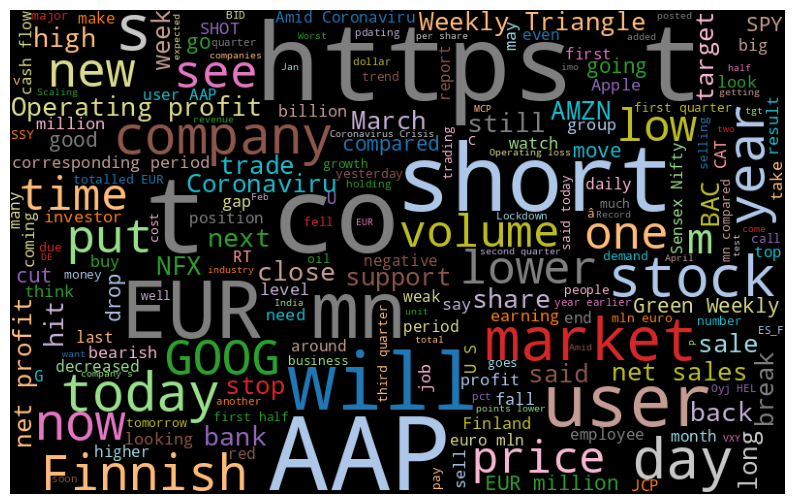

In [ ]:
# Print word cloud of negative text
all_words = " ".join([text for text in df_concatenated['Text'][df_concatenated['class'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, colormap="tab20").generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Bag of Words (bow)
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df_concatenated['Text'])
df_bow = pd.DataFrame(bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
df_bow['class_label'] = df_concatenated['class']
print(df_bow.shape)
df_bow.head()

(7758, 5831)


,00,000,00pm,01,02,03,04,05,050,06,...,znga,zone,zoom,zot,zynga,æinen,æl,ærvi,œwe,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_concatenated['Text'])
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf['class_label'] = df_concatenated['class']
print(df_tfidf.shape)
df_tfidf.head()

(7758, 5831)


,00,000,00pm,01,02,03,04,05,050,06,...,znga,zone,zoom,zot,zynga,æinen,æl,ærvi,œwe,class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Trigram
trigram_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', ngram_range=(3,3))
trigram = trigram_vectorizer.fit_transform(df_concatenated['Text'])
df_trigram = pd.DataFrame(trigram.toarray(), columns=trigram_vectorizer.get_feature_names_out())
df_trigram['class_label'] = df_concatenated['class']
print(df_trigram.shape)
df_trigram.head()

(7758, 2535)


,00 000 workers,00 1423 75,000 2009 lifted,000 corresponding period,000 eur million,000 euro mln,000 period 2006,000 period 2009,000 points day,000 quarter 2010,...,year year eur,years booked avg,years rode consumer,yes bank shares,yesterday net loss,yhtyma oyj hel,yr low today,zinc lead project,œwe havenâ really,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_bow.to_csv("bow.csv", index=False)
df_tfidf.to_csv("tfidf.csv", index=False)
df_trigram.to_csv("trigram.csv", index=False)